In [1]:
import csv 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = open('C:/Users/91962/Downloads/Datasets/startup_funding.csv')
data= pd.read_csv(file, encoding='UTF-8')
data

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
...,...,...,...,...,...,...,...,...,...,...
2367,2367,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"4,500,000",NaN
2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
2370,2370,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


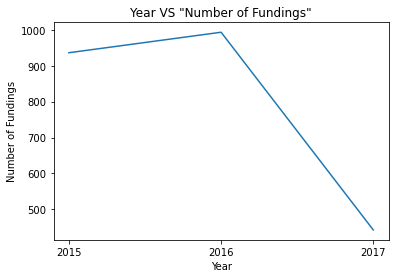

2015 936
2016 993
2017 443


In [6]:
import csv
import matplotlib.pyplot as plt
import collections
with open('C:/Users/91962/Downloads/Datasets/startup_funding.csv', encoding ='UTF-8') as file_obj:
    file_data = csv.DictReader(file_obj, skipinitialspace=True)

    dct = {}
    for row in file_data:
        year = row['Date'][-4:]
        if year in dct:
            dct[year] += 1
        else:
            dct[year] = 1
            
    ord_dct = collections.OrderedDict(sorted(dct.items()))                                  
    plt.plot(list(ord_dct.keys()),list(ord_dct.values()))
    plt.xlabel("Year")
    plt.ylabel("Number of Fundings")
    plt.title('Year VS "Number of Fundings"')
    plt.show()
    
    for i in ord_dct.keys():
        print(i,end=" ")
        print(ord_dct[i])

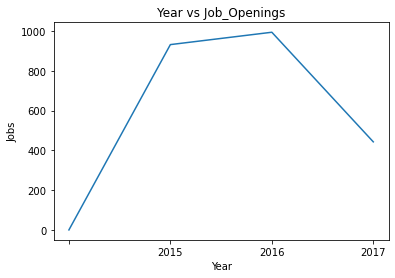

 1
2015 931
2016 993
2017 443


In [8]:
import csv
import matplotlib.pyplot as plt
with open('C:/Users/91962/Downloads/Datasets/startup_funding.csv', encoding ='UTF-8') as file:
    data= pd.read_csv(file)
    date=data['Date']
    year=date.str.split('/',expand=True)[2]
    freq= year.value_counts(ascending =True)
    freq.sort_index(inplace=True)
    x = freq.index
    y = freq
plt.plot(x,y)
plt.xlabel("Year")
plt.ylabel("Jobs")
plt.title('Year vs Job_Openings')
plt.show()

for i in range(len(x)):
    print(x[i],y[i])
#it gives wrong answer because of data corrections in data

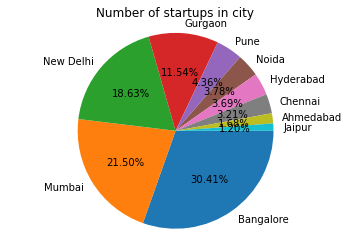

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


In [4]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
with open('C:/Users/91962/Downloads/Datasets/startup_funding.csv', encoding ='UTF-8') as file:
    df= pd.read_csv(file)
    df.dropna(subset=['CityLocation'],inplace=True)
    
    def newcity(city):
        return city.split('/')[0].strip() 
    df['CityLocation']= df['CityLocation'].apply(newcity)
    df[df['CityLocation']=='bangalore']='Bangalore'
    df[df['CityLocation']=='Delhi']='New Delhi'
    
    city= df['CityLocation']
    city= city.value_counts()[:10]
    city_name= city.index
    no_of_str = city.values
    
    #pie chart
    plt.pie(no_of_str,labels=city_name, autopct= '%.2f%%',counterclock= False)
    plt.title("Number of startups in city")
    plt.axis('equal')
    plt.show()
    
    for i in range(city_name.shape[0]):
        print(city_name[i],no_of_str[i])
    
    
    
    
    
              
    

In [13]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
with open('C:/Users/91962/Downloads/Datasets/startup_funding.csv', encoding ='UTF-8') as file:
    df= pd.read_csv(file)
    df.dropna(subset=['CityLocation'],inplace=True)
    
    def newcity(city):
        return city.split('/')[0].strip() 
    df['CityLocation']= df['CityLocation'].apply(newcity)
    df['CityLocation'].replace("Delhi","New Delhi",inplace = True)
    df['CityLocation'].replace("bangalore","Bangalore",inplace = True)
       
    df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x: float(str(x).replace(",","")))
    df= df.groupby('CityLocation'),df['AmountInUSD'].sum()
    df = df.sort_values(ascending = False)[0:10]
    city= df.index
    funding= df.values
    plt.pie(funding,labels=city, autopct= '%.2f%%',counterclock= False)
    plt.title("Funding amount")
    plt.axis('equal')
    plt.show()
    

AttributeError: 'tuple' object has no attribute 'sort_values'

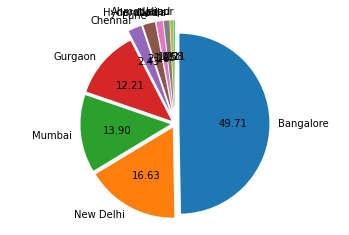

Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.read_csv('C:/Users/91962/Downloads/Datasets/startup_funding.csv',encoding = 'utf-8')
df.dropna(subset=["CityLocation"],inplace=True)
def separateCity(city):
    return city.split('/')[0].strip()
df['CityLocation'] = df['CityLocation'].apply(separateCity)
df['CityLocation'].replace("Delhi","New Delhi",inplace = True)
df['CityLocation'].replace("bangalore","Bangalore",inplace = True)

df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x: float(str(x).replace(",","")))
df = df.groupby('CityLocation')['AmountInUSD'].sum()
df = df.sort_values(ascending = False)[0:10]
city = df.index
amount = df.values
explode = [0.1,0.1,0.1,0.1,0.3,0.3,0.3,0.3,0.3,0.3]
plt.pie(amount,labels = city,autopct='%0.2f',counterclock=False,explode=explode,startangle=90,radius=2)
plt.axis('equal')
plt.show()

percent = np.true_divide(amount,amount.sum())*100
for i in range(len(city)):
    print(city[i],format(percent[i],'0.2f'))

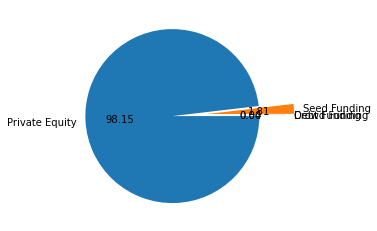

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('C:/Users/91962/Downloads/Datasets/startup_funding.csv',encoding = 'utf-8')
df['InvestmentType'].replace('SeedFunding','Seed Funding',inplace = True)
df['InvestmentType'].replace('PrivateEquity','Private Equity',inplace = True)
df['InvestmentType'].replace('DebtFunding','Debt Funding',inplace = True)
df['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace = True)
df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x: float(str(x).replace(",","")))

df = df.groupby('InvestmentType')['AmountInUSD'].sum()
df = df.sort_values(ascending = False)[:10]
investment = df.index
amount = df.values
explode= [0.2,0.2,0.1,0.1]
plt.pie(amount,labels = investment,autopct='%0.2f',counterclock=False,explode=explode)
plt.show()

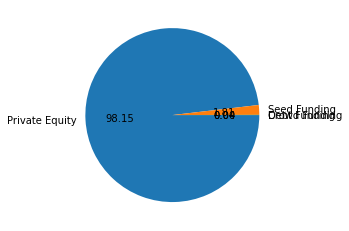

Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('C:/Users/91962/Downloads/Datasets/startup_funding.csv',encoding = 'utf-8')
df['InvestmentType'].replace('SeedFunding','Seed Funding',inplace = True)
df['InvestmentType'].replace('PrivateEquity','Private Equity',inplace = True)
df['InvestmentType'].replace('DebtFunding','Debt Funding',inplace = True)
df['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace = True)
df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x: float(str(x).replace(",","")))

df = df.groupby('InvestmentType')['AmountInUSD'].sum()
df = df.sort_values(ascending = False)[:10]
investment = df.index
amount = df.values

plt.pie(amount,labels = investment,autopct='%0.2f',counterclock=False)
plt.show()

percent = np.true_divide(amount,amount.sum())*100
for i in range(len(investment)):
    print(investment[i],format(percent[i],'0.2f'))

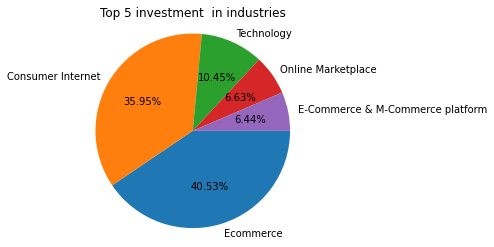

Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



df = pd.read_csv('C:/Users/91962/Downloads/Datasets/startup_funding.csv',encoding = 'utf-8')
df['IndustryVertical'].replace('ECommerce','Ecommerce',inplace = True)
df['IndustryVertical'].replace('eCommerce','Ecommerce',inplace = True)
df['IndustryVertical'].replace('ecommerce','Ecommerce',inplace = True)
df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x: float(str(x).replace(",","")))
df = df.groupby('IndustryVertical')['AmountInUSD'].sum()
df = df.sort_values(ascending = False)[:5]
industry = df.index
amount = df.values

plt.pie(amount, labels=industry, autopct='%.2f%%',counterclock= False)
plt.axis('equal')
plt.title("Top 5 investment  in industries")
plt.show()

per = np.true_divide(amount,amount.sum())*100

for i in range(len(industry)):
    print(industry[i],format(per[i],'0.2f'))

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



df = pd.read_csv('C:/Users/91962/Downloads/Datasets/startup_funding.csv',encoding = 'utf-8')
df['StartupName'].replace('Oyorooms','Oyo',inplace = True)
df['StartupName'].replace('OyoRooms','Oyo',inplace = True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace = True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Ola Cabs','Ola',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace = True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace = True)
df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x: float(str(x).replace(",","")))
df = df.groupby('StartupName')['AmountInUSD'].sum()
df = df.sort_values(ascending = False)[:5]
startup = df.index
for i in range(len(startup)):
    print(startup[i])

Paytm
Flipkart
Ola
Snapdeal
Oyo


In [6]:
df = pd.read_csv('C:/Users/91962/Downloads/Datasets/startup_funding.csv',encoding = 'utf-8')
df['StartupName'].replace('Oyorooms','Oyo',inplace = True)
df['StartupName'].replace('OyoRooms','Oyo',inplace = True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace = True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Ola Cabs','Ola',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace = True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace = True)
df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x: float(str(x).replace(",","")))

total_funding = df['StartupName'].value_counts()[:5]
startup= total_funding.index
count = total_funding.values

for i in range(5):
    print(startup[i],count[i])

Ola 9
Swiggy 7
UrbanClap 6
Paytm 6
Oyo 6


In [45]:

import pandas as pd
import numpy as np
import csv

with open('C:/Users/91962/Downloads/Datasets/startup_funding.csv', encoding='utf8') as file_obj:
    file_data=csv.DictReader(file_obj, skipinitialspace=True)
    investors=[]
    df.InvestorsName.fillna("",inplace = True)
    for row in file_data:
        
        if not ('Undisclosed' in row['InvestorsName'] or 'undisclosed' in row['InvestorsName']):
            if row !="":
                for i in row['InvestorsName'].split(','):
                    investors.append(i.strip())
    dic=dict()
    for i in investors:
        if i in dic.keys():
            dic[i]+=1
        else:
            dic[i]=1
    x=[]
    y=[]
    for i in dic.keys():
        x.append(i)
        y.append(dic[i])
    np_x=np.array(x)
    np_y=np.array(y)
    np_x=np_x[np.argsort(np_y)]
    np_y=np.sort(np_y)
    
    np_y=np_y[::-1]
    np_x=np_x[::-1]
    for i in range(len(np_x)):
        print(np_x[i], np_y[i])


Sequoia Capital 64
Accel Partners 52
 46
Kalaari Capital 44
SAIF Partners 41
Indian Angel Network 40
Blume Ventures 39
Ratan Tata 30
Rajan Anandan 25
Tiger Global 25
Nexus Venture Partners 24
IDG Ventures 22
Kae Capital 22
India Quotient 21
500 Startups 20
Anupam Mittal 18
Matrix Partners 18
Mumbai Angels 17
LetsVenture 17
Kunal Shah 17
Omidyar Network 16
Unitus Seed Fund 16
Norwest Venture Partners 15
IDG Ventures India 15
Group of Angel Investors 15
Sequoia India 15
ah! Ventures 14
Tracxn Labs 14
Tiger Global Management 14
Sandeep Tandon 14
Bessemer Venture Partners 14
TV Mohandas Pai 14
Anand Chandrasekaran 13
Helion Venture Partners 13
Girish Mathrubootham 13
Brand Capital 13
Jungle Ventures 13
Kunal Bahl 13
Lightspeed Venture Partners 12
Singapore Angel Network 12
Rohit Bansal 12
Aprameya Radhakrishna 12
The Chennai Angels 12
Orios Venture Partners 11
Flipkart 11
Vijay Shekhar Sharma 11
Axilor Ventures 11
YourNest Angel Fund 11
YouWeCan Ventures 11
Nandan Nilekani 10
RoundGlass Pa

Naresh Ravindranath 1
Boman Irani 1
Dhruv Chitgopekar 1
Prantik Dasgupta 1
Hemant Sahni 1
Bravia Capital 1
Newbie Promoters 1
General Catalyst Partners 1
TLabs 1
LightBox Ventures 1
Axis Capital & Others 1
RVCF and SIDBI 1
Next Orbit Ventures Fund 1
Rajesh Arora 1
Nitin Passi 1
Sudhir Mallem 1
Radhakrishnan Natarajan & Others 1
Shun Yoshida & Others 1
Yang Shu 1
Shekhar Sahu 1
Nitesh Pant 1
Dileep Bhatt 1
Milind Chaudhary 1
Krishna Rokhale 1
Mahindra Univeg 1
Recruit Holdings 1
Viraj Tyagi & Others 1
Mahindra Holidays & Resorts India Ltd 1
Naveen Arya 1
Tarun Joshi 1
Xchange Investors NV 1
TransGlobal FZC 1
3One4 Capital 1
Pravin Gandhi 1
Smart Start Fund; Kunal Shah 1
& Others 1
Russian venture capital fund Ru-Net 1
Healthsquad 1
Ventureast Fund Advisors 1
Sumpoorna Group 1
HAX Accelerator 1
Sanjay Nayar 1
Anil Jaggia 1
Narayan Seshadri 1
Mobikon 1
Blume ventures 1
Janak Jain 1
KAE capital 1
Amit Nagar 1
Harinder Takhar 1
Zain Raj 1
Dr. Prasad Kaipa 1
Abaran Deep 1
Aseem Sood 1
Mustaf

TV Mohandas Pai’s family office 1
Saina Nehwal 1
Leo Wang Sangeeth Ram 1
Jozef Bardik 1
BEENEXT Ventures 1
Info Edge 1
TNN Capital and others 1
Internet Group 1
Logtally 1
Gordon and Betty Moore Foundation 1
Jitu Virwani 1
Rimpal Chawla 1
Ravi Krishnamurthy 1
Enablers platform 1
Baillie Gifford 1
Inara Capital 1
Rishi Khiani 1
Blackstone Valley Group 1
Raghu Vohra 1
Aditya Dev Sood 1
Kamal Bansal 1
Bessemer Venture Partner 1
Accel 1
Karnataka Semiconductor Venture Capital firm 1
S.D. Shibulal 1
Chandralekha Construction Pvt. Ltd. 1
Ness Wadia 1
Roopak Taneja 1
Vectr Ventures 1
Siddharth Patil 1
Girish Reddy 1
Sharad Hegde 1
Ruchir Arora & others 1
Collaborative Licensing Ventures LLP 1
Unitus Impact Livelihoods Fund 1
Medi Assist 1
SAIF Partners & others 1
BrahmaX Ventures 1
Venture Nursery 1
HT Digital Media Holdings Ltd 1
Palred Technologies Ltd 1
Arathi Krishna 1
Murugappa Group 1
Shrikant Patil 1
Times Group Brand Capital 1
Segnel Venture 1
Shinji Kimura 1
Sundar Chanrai 1
SingTel’

Vineet Nalla 1
Lashit Sanghvi 1
Venkat Vardhan 1
Mohammed Bin Abdul Rehman Al Khalifa 1
Ralph Berezan 1
Vissal Mathew 1
Balamurali Krishna 1
The Saha Fund 1
CIO Angel Network (CAN) 1
Times Internet Ltd & One more Fund 1
Chandigarh Angel Network (CAN) 1
Beerud Sheth and Ravi Mantha 1
Praveen Saini 1
Ankush Saigal 1
Bharat Gupta 1
Shuchin Bajaj 1
Ajay Sarupria 1
Shrem Strategies 1
Puneet Agarwal 1
SoftBank Ventures Korea 1
Jay Vijayan 1
Sarva Capital 1
Kishore Kumar 1
Rajan Anandan & other angel investors 1
Aditya Vij 1
Robin Utthappa 1
Rahul Agarwal 1
Shobhit Shukla 1
Sanjiv Mittal 1
Bharanidharan Viswanathan 1
Wipro Ventures 1
Dunamis Ventures Pte Ltd. 1
Ingram Content Group 1
Oranda Global & Others 1
Sherpa Capital 1
Nyca Partners and Thomvest Ventures 1
Vandana Luthra 1
Venturesity 1
Ashish Kashyap 1
Zia Mody 1
Ananda Kallugadde 1
Rakesh Desai 1
Rakesh Malhotra 1
Vinod Jain & Others 1
Vinod Bansal 1
Sanjeev Singhal 1
Mahesh Parasuraman 1
Broadbean Capital services 1
Mekin Maheshwar 1